In [3]:
# Import modules

#import wget
import numpy as np
import matplotlib.pyplot as plt
import sciann as sn
from sklearn.model_selection import train_test_split

---------------------- SCIANN 0.6.7.3 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 
TensorFlow Version: 2.8.0 
Python Version: 3.10.4 (main, Mar 31 2022, 08:41:55) [GCC 7.5.0] 



In [11]:
# Prepare data

import numpy as np
from numpy import float64
import random

#train_size = 168076
#test_size = 210095 - 168076
train_size = 1000
test_size = 200

x1_train = np.zeros((train_size,1))
x2_train = np.zeros((train_size,1))
x3_train = np.zeros((train_size,1))
f_train = np.zeros((train_size,1))

x1_test = np.zeros((test_size,1))
x2_test = np.zeros((test_size,1))
x3_test = np.zeros((test_size,1))
f_test = np.zeros((test_size,1))

for i in range(train_size):
    x1_train[i,0] = random.random()*2*np.pi
    x2_train[i,0] = random.random()*2*np.pi
    x3_train[i,0] = random.random()*2*np.pi
    f_train[i,0] = np.sin(x1_train[i,0])*np.sin(x2_train[i,0])*np.sin(x3_train[i,0])*np.random.normal(0,1)

for i in range(test_size):
    x1_test[i,0] = random.random()*2*np.pi
    x2_test[i,0] = random.random()*2*np.pi
    x3_test[i,0] = random.random()*2*np.pi
    f_test[i,0] = np.sin(x1_test[i,0])*np.sin(x2_test[i,0])*np.sin(x3_test[i,0])*np.random.normal(0,1)    

#print(x1_train)
#print(f_train)

print(x1_train.shape)


(1000, 1)


In [9]:
# Set up NN

x1 = sn.Variable('x1')
x2 = sn.Variable('x2')
x3 = sn.Variable('x3')
f = sn.Functional('f',[x1,x3,x3],[10,10,10,10],activation='tanh')

# Set up Model

data1 = sn.Data(f)
model = sn.SciModel([x1,x2,x3],targets=data1)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 x1 (InputLayer)                [(None, 1)]          0           []                               
                                                                                                  
 x3 (InputLayer)                [(None, 1)]          0           []                               
                                                                                                  
 concat_3 (Concatenate)         (None, 3)            0           ['x1[0][0]',                     
                                                                  'x3[0][0]',                     
                                                                  'x3[0][0]']                     
                                                                                            


Total samples: 1000 
Batch size: 64 
Total batches: 16 


Epoch 190: ReduceLROnPlateau reducing learning rate to 0.0010000000474974513.


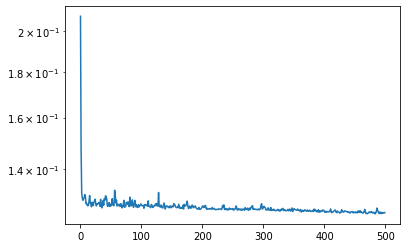

In [10]:
# train the model

from tabnanny import verbose

running = model.train([x1_train[:,0],x2_train[:,0],x3_train[:,0]],f_train,batch_size=64,learning_rate=0.002, epochs=500,verbose=0)

plt.semilogy(running.history['loss'])
